# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [6]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

Статистика очень тесно связана с машинным обучением. Этот раздел математики помогает ответить, какие из признаков важны, позволяет выдвигать и проверять гипотезы и идеи. Статистика лежит в основе алгоритмов машинного обучения, методов разведывательного анализа данных. С элементами математической статистики мы столкнёмся в каждом модуле этого курса.

>Математическая статистика — раздел математики, который занимается систематизацией и обработкой данных для их использования и получения выводов.

Данные, собранные в ходе исследования каких-то явлений или процессов, сами по себе не очень информативны. Чтобы извлечь из данных какие-то полезные идеи, применяется описательная статистика, которую мы и будем изучать в этом модуле.

>Например, мы исследуем, от каких факторов зависит удовлетворенность жизнью, имея на руках информацию о доходах населения. Сами по себе эти данные мало что дают. 

Проанализировав этот признак, с помощью знаний описательной статистики мы получим примерно такие статистические данные:

- средний доход;
- средний доход в регионе проживания;
- средний доход в разрезе пола;
- разница между минимальным и максимальным доходом;
- а также другие показатели, которые могут охарактеризовать доход человека более детально. 

После извлечения идей мы получаем статистические данные.

>Статистические данные — упорядоченные, классифицированные данные о каком-то явлении или процессе.

Так как в процессе получения статистических данных появляются новые признаки, то этот процесс касается не только математической статистики, но и проектирования признаков — ещё одной части разведывательного анализа данных, который будет изучен в следующем модуле. 

Прежде чем применять математические статистики к разведывательному анализу данных, необходимо изучить описательные статистики — с ними мы познакомимся в следующем юните. Без понимания этих основ будет невозможно двигаться дальше по всем этапам машинного обучения.

В ЭТОМ МОДУЛЕ ВЫ УЗНАЕТЕ:
- для чего необходима статистика в машинном обучении;
- что такое одномерный анализ;
- ключевые понятия из математической статистики;
- что такое корреляция и коэффициент корреляции;
- типы корреляций и их отличие.

ЦЕЛИ МОДУЛЯ
- изучить ключевые понятия из математической статистики;
- изучить одномерный анализ, меры центральной тенденции;
- изучить, что такое корреляция и коэффициент корреляции;
- научиться считать коэффициент корреляции;
- научиться строить визуализацию матрицы корреляции;
- научиться различать корреляции и применять их.

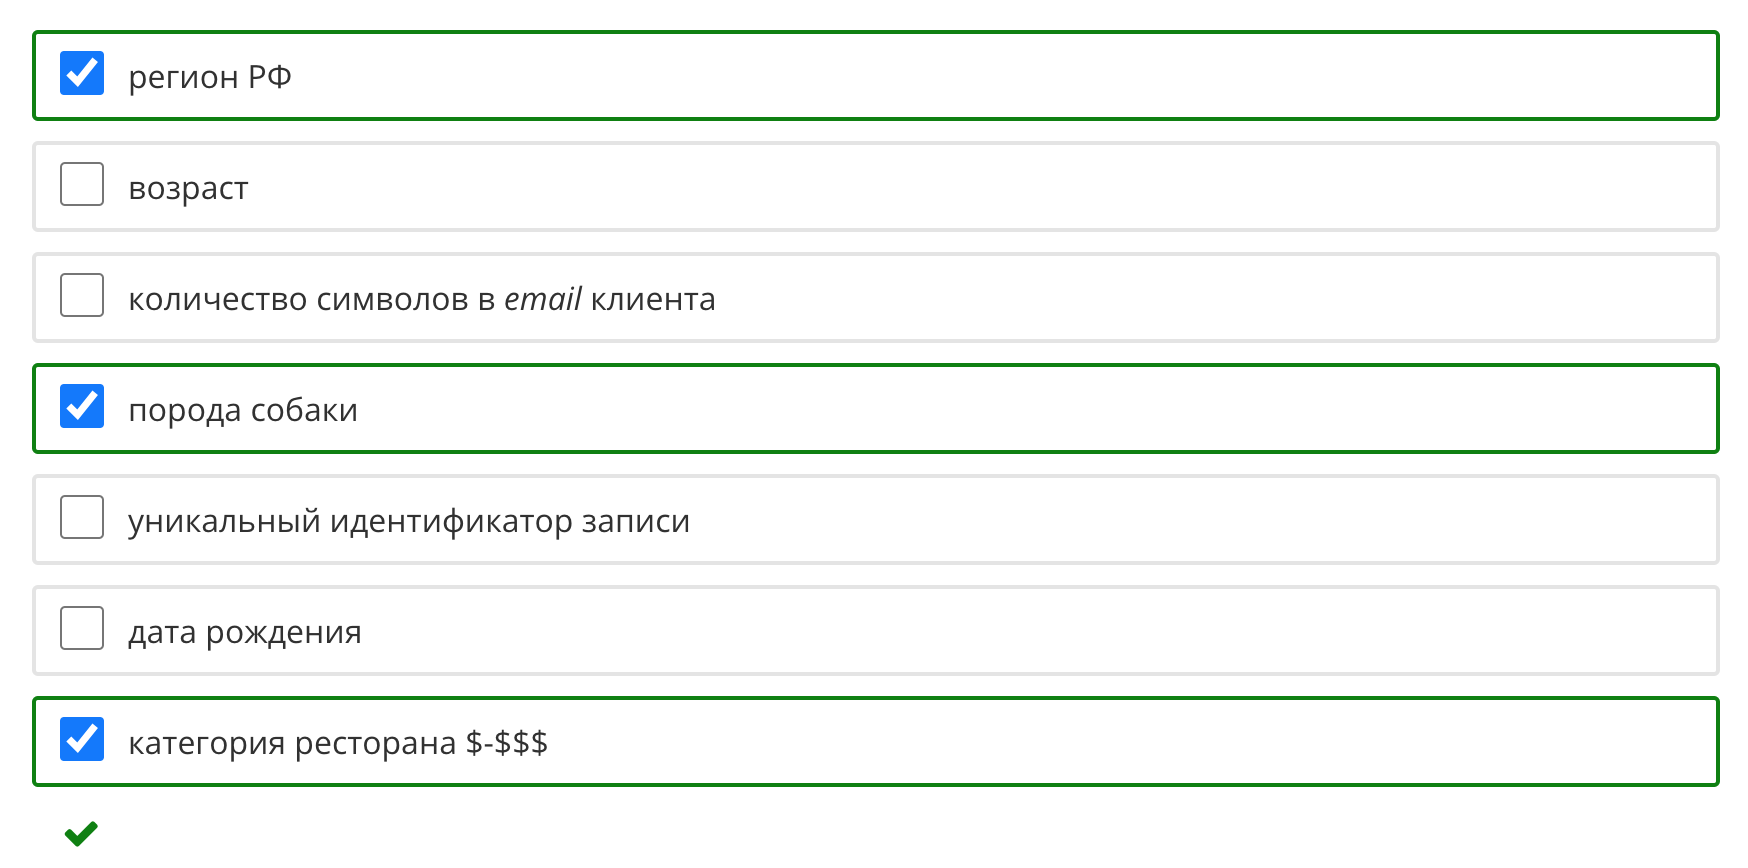

#### Описательная статистика. Меры центральной тенденции в Python

После подготовки и очистки данных винных обзоров мы готовы провести статистический анализ данных, представленных в нашем наборе, чтобы составить выводы о самих признаках и их взаимосвязях.

Описательную статистику можно применять к одной переменной или к целому набору данных.

Когда вы описываете и вычисляете характеристики одной переменной, вы выполняете одномерный анализ. 

>Например, вы хотите узнать больше о сомелье, которые давали подробный отзыв вину. Вы анализируете признак независимо от других, как будто в датасете не существует других признаков. Вы можете просмотреть, сколько сомелье приняло участие в обзоре вин. Можете проанализировать информацию и увидеть, какой сомелье чаще всего оценивал вино. Возможно, эта информация будет важна, и на этапе проектирования и преобразования признаков мы обработаем признаки на основе этих выводов. 

Когда вы анализируете пару переменных и больше, то вы делаете многомерный анализ. Целью такого анализа является нахождение связей между признаками. 

>Мы можем проанализировать, есть ли связь между сортом винограда и ценой бутылки вина. Для этого используется корреляционный анализ, с которым мы познакомимся в следующем юните. Для оценки рейтинга вина можем оценить статистическую значимость переменных, которую мы изучим в следующих модулях. Например, если цена за бутылку вина окажется неважным признаком, то мы сможем удалить его из датасета, так как он не влияет на рейтинг вина.

К одномерному анализу вы можете отнести вычисление максимальных и минимальных значений какого-либо признака, вычисление средних значений, часто встречающихся значений и размаха. 

In [10]:
# Вычислите наименьший балл за вино в датасете.
df = pd.read_csv('data/wine_cleared.zip')
df['points'].min()

80

In [11]:
# Вычислите наименьшую цену за бутылку в наборе данных.
df['price'].min()

4.0

Вычисление среднего также относится к одномерному анализу. Но что значит среднее?

>Например, средняя зарплата в Краснодарском крае составляет 43 000 руб. Это число даёт нам представление о среднестатистическом жителе этого края. 

Но что здесь означает средняя зарплата и среднестатистический житель? Среднее арифметическое, середина распределения или что-то другое? Чтобы ответить на этот вопрос, нам необходимо знать, что такое мера центральной тенденции.

>Мера центральной тенденции — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

Далее мы рассмотрим наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода. Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой statistics. Она предоставляет готовые функции для вычисления математической статистики для числовых данных.

установка
- pip install statistics

#### Среднее арифметическое

>Среднее арифметическое — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).

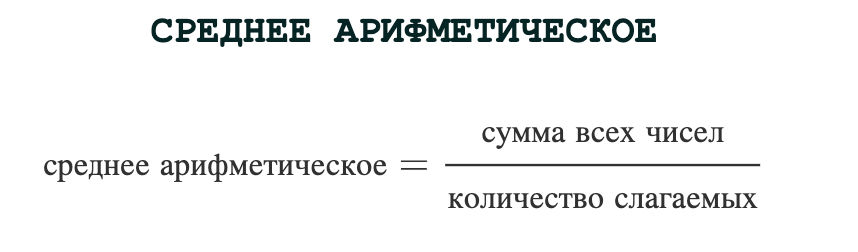

In [16]:
import statistics
# Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() 
# библиотеки statistics. Округлите значение до сотых.
df['price'].mean().round(2)

35.36

In [17]:
# Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.
df['price'].sum()/df['price'].count()

35.363389129985535

>Среднее арифметическое хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях. 

Возьмём в пример рост человека. Если в выборке попадутся игроки баскетбольной команды или карлики, представление о среднем росте человека сильно исказится. Если таких значений в выборке будет мало, скорее всего, они будут обработаны на этапе очистки данных от выбросов. Если после очистки данных большой разброс останется, вы можете снова вернуться к этому этапу, так как цикл машинного обучения не линеен, или использовать другую описательную статистику для получения среднего значения.

#### МЕДИАНА

>Медиана — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

Методы современных библиотек, в том числе и используемой нами statistics для вычисления медианы, самостоятельно выполняют сортировку данных — вам не нужно заботиться об этом. 

![image.png](attachment:image.png)

                                    Медиана делит распределение признака ровно пополам

Если количество элементов чётное, медианой будет среднее арифметическое двух средних элементов распределения.

![image-2.png](attachment:image-2.png)

In [19]:
# Вычислите медиану стоимости бутылки вина при помощи функции statistics.median()
# библиотеки statistics. Округлите значение до сотых.
df['price'].median()

28.0

In [39]:
# Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.
n = len(df['price'])
index = n // 2
if n % 2:
    mediana = df['price'].sort_values().iloc[index]
else:
    mediana = (df['price'].sort_values().iloc[index - 1] + df['price'
                                        ].sort_values().iloc[index + 1]) / 2
mediana

28.0

In [35]:
# или
count_price = len(df['price']) # количество записей цен
sorted_price = sorted(df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

>В отличие от среднего арифметического медиана хорошо справляется с разбросом в значениях, поэтому её чаще используют. Также медиана разбивает данные на две группы, состоящие из одинакового количества элементов.

Средние значения, например уровень дохода или цена на недвижимость, часто вычисляются именно по медиане, потому что в этом случае важен средний уровень доходов большей части населения. 

>В таком случае основатель Amazon Джефф Безосс с годовым доходом в несколько миллиардов не испортит нам всю статистику. 

Также в библиотеке statistics есть функции, связанные с медианой, — функция statistics.median_low() и функция statistics.median_high().

→ В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().

В случае, когда количество элементов чётное, у нас получается два средних значения:

- median_low() возвращает меньшее из них;
- median_high() возвращает большее из них.

>Примечание. Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

#### МОДА

Мода — самое часто встречающееся значение в числовом или нечисловом ряду данных.

>Допустим, вы решили полететь в отпуск со своими друзьями и решили выбрать месяц. Вы провели опрос, кому в какой месяц было бы удобнее. Месяцы в году — это числовой ряд от 1 до 12. Дима и Серёжа свободны в феврале. Толя может взять отпуск в любой месяц года, а Ксюша может только в июне. Как в этом случае поступите вы?

Очевидно, выберете месяц, который выбрало большинство; остальные подстроятся либо не полетят с вами.

Чаще всего мода используется в нечисловых рядах. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

In [41]:
# Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи 
# функции statistics.mode() библиотеки statistics. Округлите значение до сотых.
df['price'].mode()[0]

35.363389129985535

In [42]:
df[df['price'] == 35.363389129985535]

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,35.363389,Beaujolais,Beaujolais-Villages,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,35.363389,Sicily & Sardinia,Sicilia,unknown,unknown,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,35.363389,Sicily & Sardinia,Sicilia,unknown,unknown,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129844,129844,Italy,"Doga delle Clavule is a neutral, mineral-drive...",Doga delle Clavule,86,35.363389,Tuscany,Morellino di Scansano,unknown,unknown,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo
129860,129860,Portugal,This rich wine has a firm structure as well as...,Pacheca Superior,90,35.363389,Douro,unknown,Roger Voss,@vossroger,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca
129863,129863,Portugal,This mature wine that has 50% Touriga Nacional...,Reserva,90,35.363389,Dão,unknown,Roger Voss,@vossroger,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo
129893,129893,Italy,"Aromas of passion fruit, hay and a vegetal not...",Corte Menini,91,35.363389,Veneto,Soave Classico,Kerin O’Keefe,@kerinokeefe,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare
